# K-means clustering using scikit-learn

In [18]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

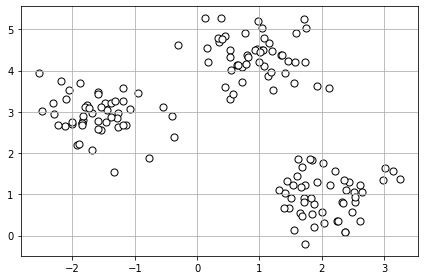

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
            X[:,1],
            c='white',
            marker='o',
            edgecolors='black',
            s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,         # run the k-means algorithm 10 times independently with different random centroids
            max_iter=300,      # maximum number of iterations
            tol=1e-04,         # tolerance for convergence problems
            random_state=0)    # What is this?
y_km = km.fit_predict(X)

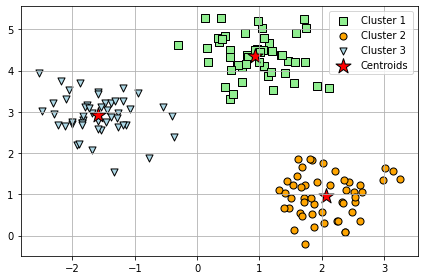

In [21]:
from cProfile import label


plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolors='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolors='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolors='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolors='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

# Placing initial cluster centroids using k-means++

In [22]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,         # run the k-means algorithm 10 times independently with different random centroids
            max_iter=300,      # maximum number of iterations
            tol=1e-04,         # tolerance for convergence problems
            random_state=0)    # What is this?
y_km = km.fit_predict(X)

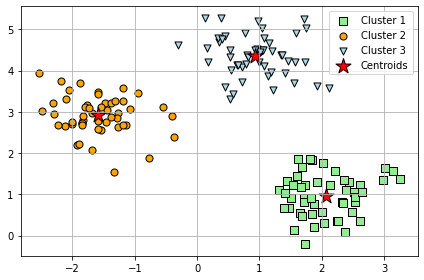

In [23]:
from cProfile import label


plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolors='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolors='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolors='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolors='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

# Using the elbow method to find the optimal number of clusters
We need intrinsic methods such as the within-cluster SSE (distortion) to compare performance of different clusterings. scikit-learn stores this information as the `inertia_` attribute after fitting a `KMeans` model.

In [24]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


The *elbow method* helps one estimate the optimal clusters. If *k* increases, the distortion will increase. The elbow method helps identify the value of *k* where the distortion begins to increase most rapidly.

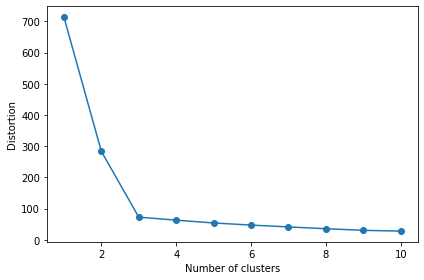

In [25]:
distortions=[]
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

The elbow is located at *k*=3, which means three is a good choice of *k* for this dataset.